In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import math


In [35]:
df2015 = pd.read_csv('../Data/2015.csv')
df2016 = pd.read_csv('../Data/2016.csv') 
df2017 = pd.read_csv('../Data/2017.csv')
df2018 = pd.read_csv('../Data/2018.csv')
df2019 = pd.read_csv('../Data/2019.csv')

# *Year 2015*

In [37]:
df2015.head(6)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955


In [38]:
df2015.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


In [39]:
df2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [40]:
df2015.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [41]:
df2015.duplicated().any()

np.False_

In [42]:
df2015.nunique()

Country                          158
Region                            10
Happiness Rank                   157
Happiness Score                  157
Standard Error                   153
Economy (GDP per Capita)         158
Family                           158
Health (Life Expectancy)         157
Freedom                          158
Trust (Government Corruption)    157
Generosity                       158
Dystopia Residual                158
dtype: int64

# *year 2016*

In [43]:
df2016.head(6)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596
5,Canada,North America,6,7.404,7.335,7.473,1.44015,1.09610,0.82760,0.57370,0.31329,0.44834,2.70485


In [44]:
df2016.tail()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
153,Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558
154,Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789
156,Burundi,Sub-Saharan Africa,157,2.905,2.732,3.078,0.06831,0.23442,0.15747,0.04320,0.09419,0.20290,2.10404


In [45]:
df2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [46]:
df2016.nunique()

Country                          157
Region                            10
Happiness Rank                   154
Happiness Score                  154
Lower Confidence Interval        154
Upper Confidence Interval        154
Economy (GDP per Capita)         157
Family                           157
Health (Life Expectancy)         156
Freedom                          157
Trust (Government Corruption)    156
Generosity                       157
Dystopia Residual                157
dtype: int64

In [47]:
df2016.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [48]:
df2016.duplicated().any()

np.False_

# *year 2017* 

In [49]:
df2017.head(6)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
5,Netherlands,6,7.377,7.427426,7.326574,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804


In [50]:
df2017.tail()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
150,Rwanda,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061
151,Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574
152,Tanzania,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130
153,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024
154,Central African Republic,155,2.693,2.864884,2.521116,0.000000,0.000000,0.018773,0.270842,0.280876,0.056565,2.066005


In [51]:
df2017.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        155 non-null    object 
 1   Happiness.Rank                 155 non-null    int64  
 2   Happiness.Score                155 non-null    float64
 3   Whisker.high                   155 non-null    float64
 4   Whisker.low                    155 non-null    float64
 5   Economy..GDP.per.Capita.       155 non-null    float64
 6   Family                         155 non-null    float64
 7   Health..Life.Expectancy.       155 non-null    float64
 8   Freedom                        155 non-null    float64
 9   Generosity                     155 non-null    float64
 10  Trust..Government.Corruption.  155 non-null    float64
 11  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 

In [52]:
df2017.nunique()

Country                          155
Happiness.Rank                   155
Happiness.Score                  151
Whisker.high                     155
Whisker.low                      155
Economy..GDP.per.Capita.         155
Family                           155
Health..Life.Expectancy.         155
Freedom                          155
Generosity                       155
Trust..Government.Corruption.    155
Dystopia.Residual                155
dtype: int64

In [53]:
df2017.isnull().sum()

Country                          0
Happiness.Rank                   0
Happiness.Score                  0
Whisker.high                     0
Whisker.low                      0
Economy..GDP.per.Capita.         0
Family                           0
Health..Life.Expectancy.         0
Freedom                          0
Generosity                       0
Trust..Government.Corruption.    0
Dystopia.Residual                0
dtype: int64

In [54]:
df2017.duplicated().any()

np.False_

# *year 2018*

In [55]:
df2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     155 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [56]:
df2018.head(6)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357
5,6,Netherlands,7.441,1.361,1.488,0.878,0.638,0.333,0.295


In [57]:
df2018.tail()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
151,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064
152,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097
153,154,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038
155,156,Burundi,2.905,0.091,0.627,0.145,0.065,0.149,0.076


In [58]:
df2018.nunique()

Overall rank                    156
Country or region               156
Score                           154
GDP per capita                  147
Social support                  146
Healthy life expectancy         143
Freedom to make life choices    136
Generosity                      122
Perceptions of corruption       110
dtype: int64

In [59]:
df2018.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       1
dtype: int64

In [60]:
df2018.duplicated().any()

np.False_

# *year 2019*

In [61]:
df2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [62]:
df2019.tail()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035
155,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091


In [63]:
df2019.nunique()

Overall rank                    156
Country or region               156
Score                           155
GDP per capita                  146
Social support                  145
Healthy life expectancy         119
Freedom to make life choices    130
Generosity                      118
Perceptions of corruption       113
dtype: int64

In [64]:
df2019.head(6)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343


In [65]:
df2019.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [66]:
df2019.duplicated().any()

np.False_

### *World_Happiness_Report*

In [67]:
happiness_df = pd.read_csv('../Data/World_Happiness_Report.csv')

In [68]:
happiness_df.head()

,Country,Happiness Rank,Happiness Score,GDP per Capita,Social support,Healthy life expectancy,Freedom,Generosity,Perceptions of corruption,Year
0,Switzerland,1,7.587,1.397,1.350,0.941,0.666,0.297,0.420,2015
1,Iceland,2,7.561,1.302,1.402,0.948,0.629,0.436,0.141,2015
2,Denmark,3,7.527,1.325,1.361,0.875,0.649,0.341,0.484,2015
3,Norway,4,7.522,1.459,1.331,0.885,0.670,0.347,0.365,2015
4,Canada,5,7.427,1.326,1.323,0.906,0.633,0.458,0.330,2015


In [69]:
happiness_df.columns.tolist()

['Country',
 'Happiness Rank',
 'Happiness Score',
 'GDP per Capita',
 'Social support',
 'Healthy life expectancy',
 'Freedom',
 'Generosity',
 'Perceptions of corruption',
 'Year']

In [70]:
happiness_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    782 non-null    object 
 1   Happiness Rank             782 non-null    int64  
 2   Happiness Score            782 non-null    float64
 3   GDP per Capita             782 non-null    float64
 4   Social support             782 non-null    float64
 5   Healthy life expectancy    782 non-null    float64
 6   Freedom                    782 non-null    float64
 7   Generosity                 782 non-null    float64
 8   Perceptions of corruption  781 non-null    float64
 9   Year                       782 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 61.2+ KB


In [71]:
happiness_df['Country'].nunique()

170

### *Distribucion de happiness score*

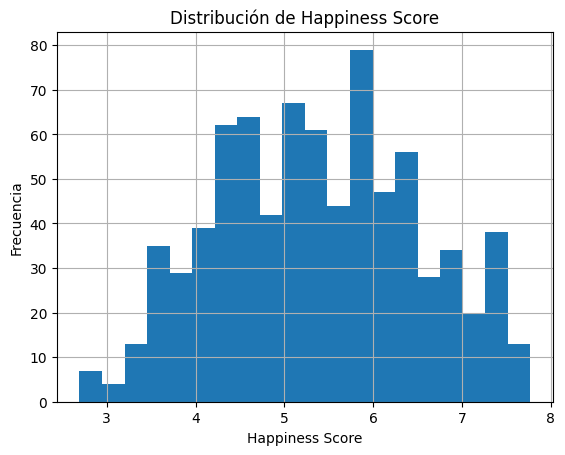

In [72]:
plt.figure()
happiness_df['Happiness Score'].hist(bins=20)
plt.title('Distribución de Happiness Score')
plt.xlabel('Happiness Score')
plt.ylabel('Frecuencia')
plt.show()

### *Tendencia temporal del puntaje de felicidad*

### *Objetivo: ver cómo ha evolucionado el “Happiness Score” a lo largo del tiempo.*
### *Gráfica: línea*

C:\Users\ruizt\AppData\Local\Temp\ipykernel_15500\2973131557.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=happiness_df, x="Year", y="Happiness Score", ci=None)


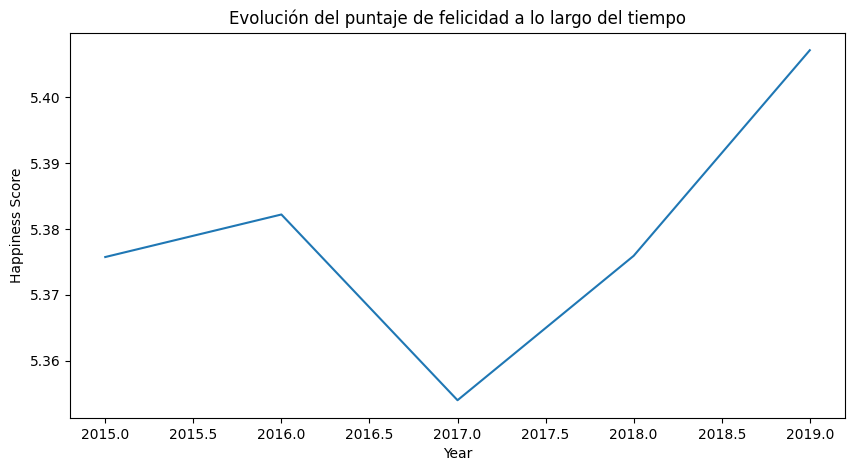

In [73]:
plt.figure(figsize=(10,5))
sns.lineplot(data=happiness_df, x="Year", y="Happiness Score", ci=None)
plt.title("Evolución del puntaje de felicidad a lo largo del tiempo")
plt.ylabel("Happiness Score")
plt.show()

### *Relación entre riqueza y felicidad*

### *Objetivo: comprobar si los países más ricos tienden a ser más felices.*
### *Gráfica: dispersión con ajuste lineal*

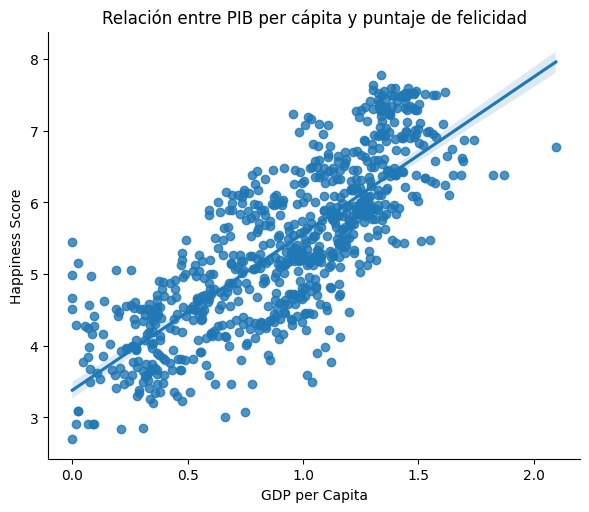

In [74]:
sns.lmplot(data=happiness_df, x="GDP per Capita", y="Happiness Score", height=5, aspect=1.2)
plt.title("Relación entre PIB per cápita y puntaje de felicidad")
plt.show()


### *Comparación entre factores sociales*

### *Objetivo: comparar qué variables se asocian más con la felicidad.*
### *Gráfica: mapa de calor de correlaciones*

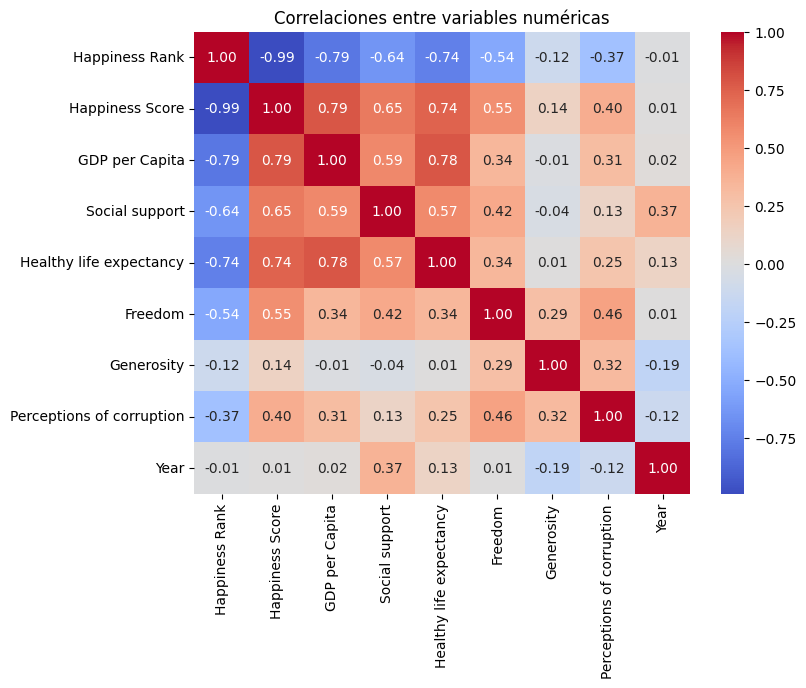

In [75]:
corr = happiness_df.select_dtypes('number').corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlaciones entre variables numéricas")
plt.show()


### *Ranking de los países más felices por año*

### *Objetivo: ver qué países se mantienen en el top del ranking.*
### *Gráfica: barras*

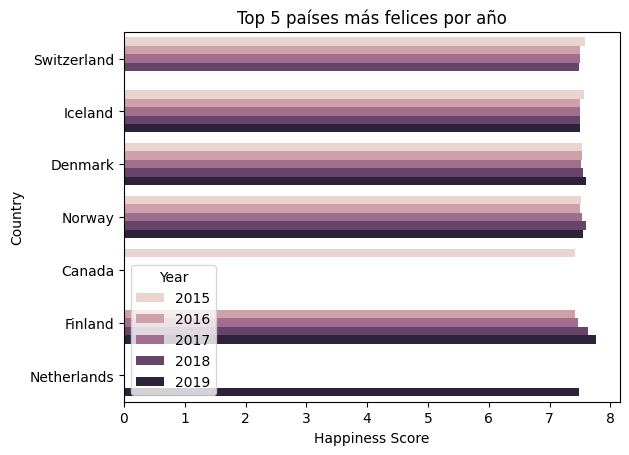

In [76]:
top = happiness_df[happiness_df["Happiness Rank"] <= 5]
sns.barplot(data=top, x="Happiness Score", y="Country", hue="Year")
plt.title("Top 5 países más felices por año")
plt.show()


### *Percepción de corrupción vs generosidad*

### *Objetivo: explorar el efecto de la confianza social y la corrupción.*
### *Gráfica: dispersión*

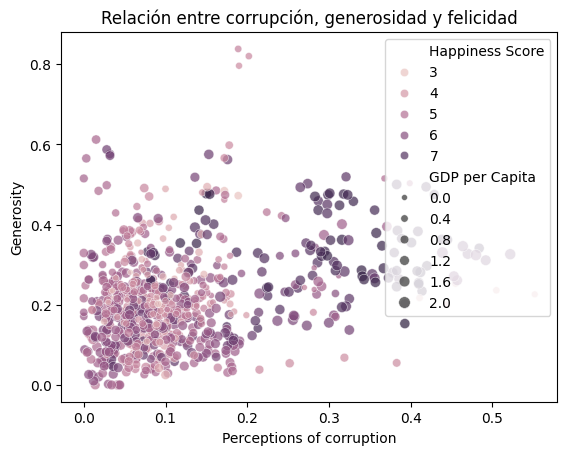

In [77]:
sns.scatterplot(data=happiness_df, x="Perceptions of corruption", y="Generosity", hue="Happiness Score", size="GDP per Capita", alpha=0.7)
plt.title("Relación entre corrupción, generosidad y felicidad")
plt.show()


### *Distribucion de variables numericas* 

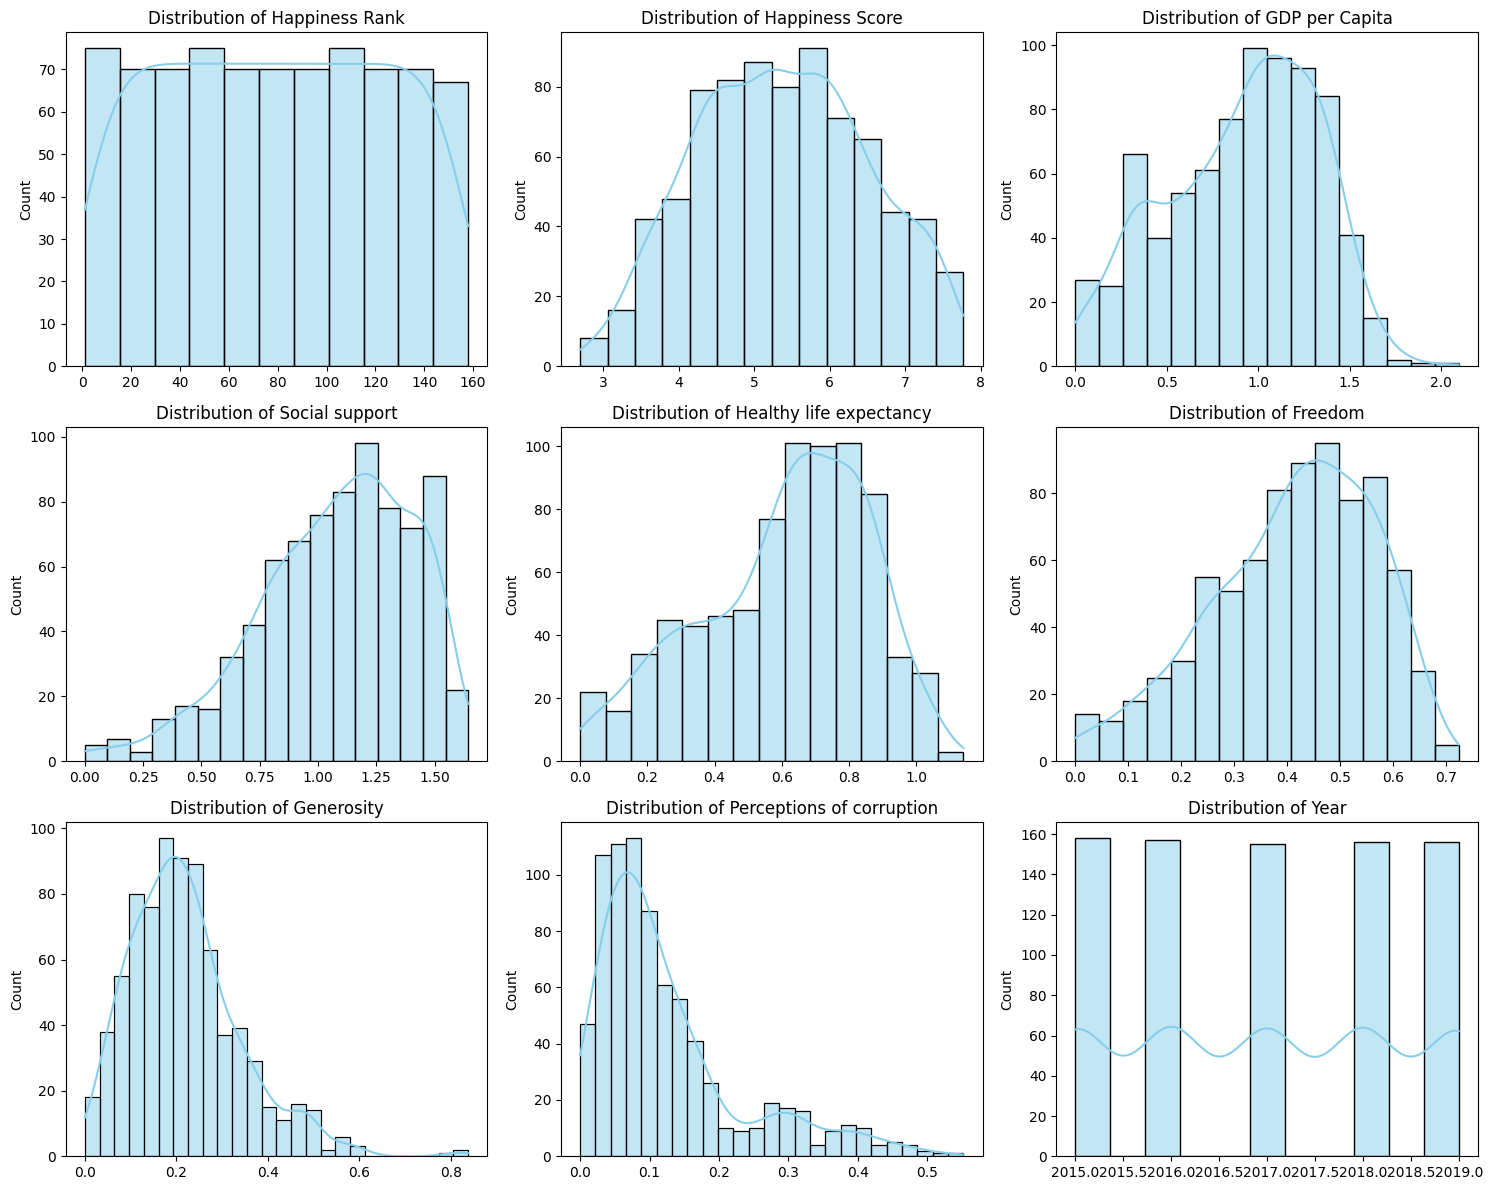

In [78]:
numeric_columns = happiness_df.select_dtypes(include=['float64', 'int64']).columns
n_cols = 3  # número de columnas por fila
n_rows = math.ceil(len(numeric_columns) / n_cols)

plt.figure(figsize=(5*n_cols, 4*n_rows))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(happiness_df[column], kde=True, color="skyblue")
    plt.title(f'Distribution of {column}', fontsize=12)
    plt.xlabel('')
plt.tight_layout()
plt.show()

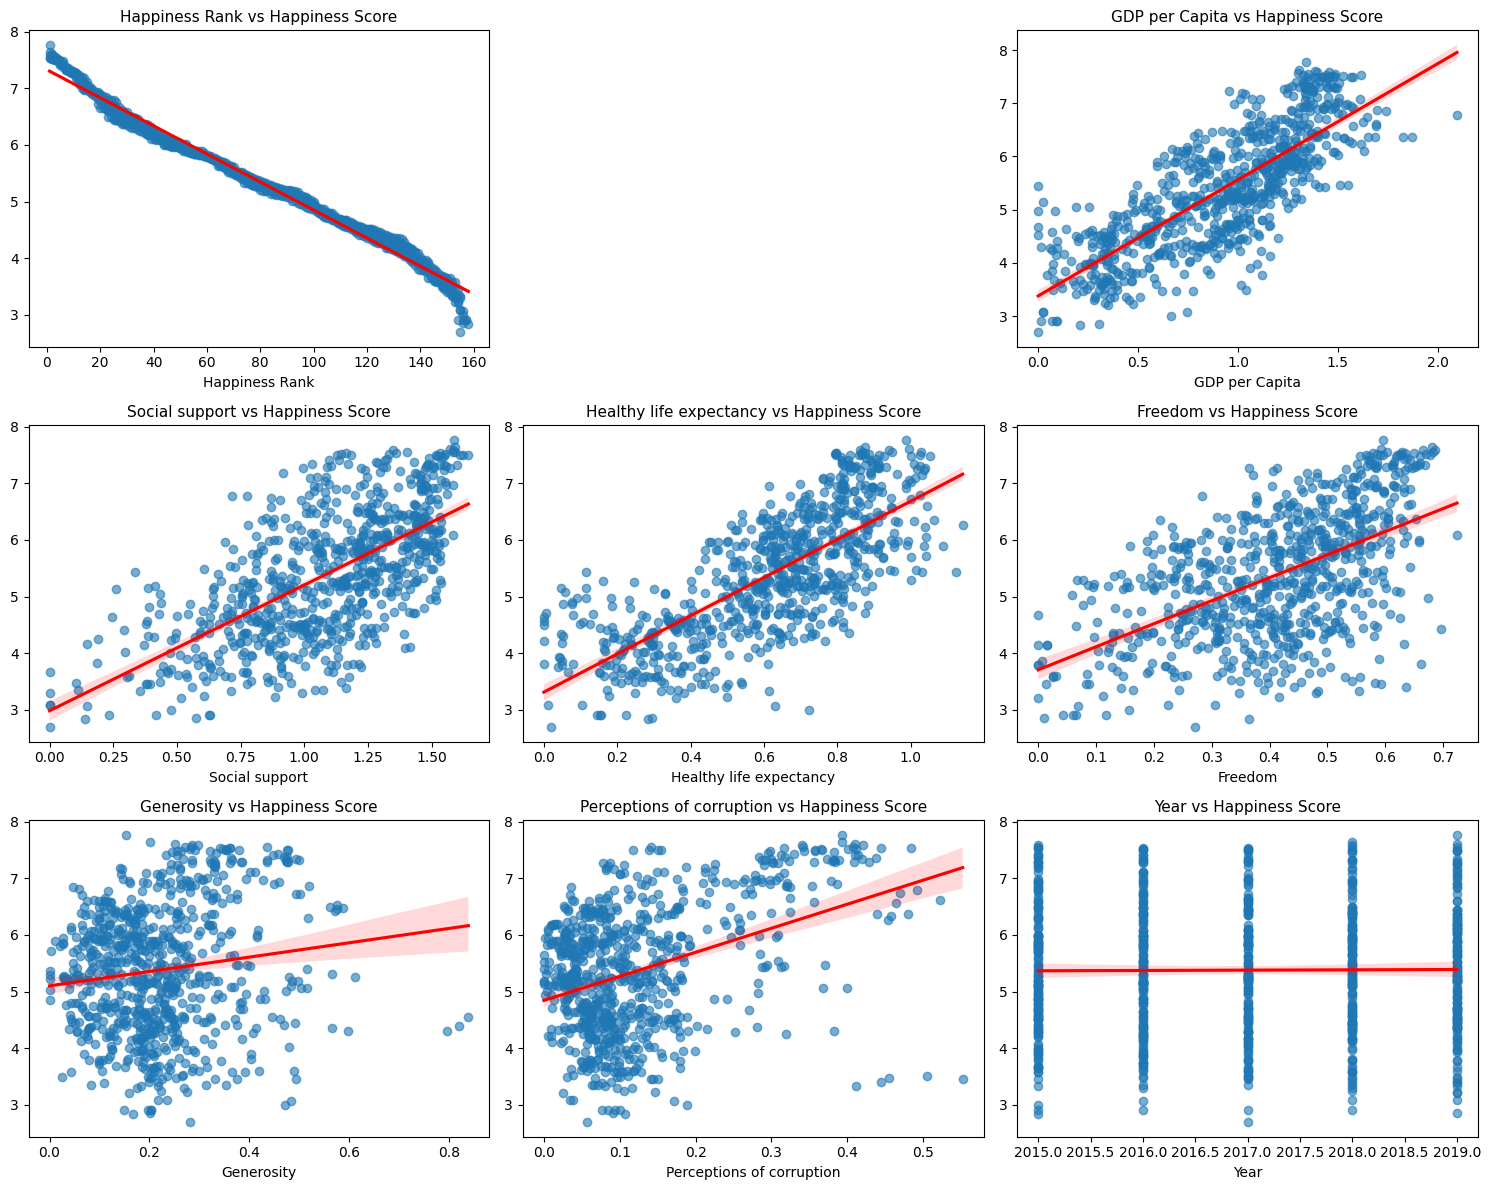

In [79]:
target = 'Happiness Score'
numeric_columns = happiness_df.select_dtypes(include=['float64', 'int64']).columns
n_cols = 3
n_rows = math.ceil((len(numeric_columns) - 1) / n_cols)

plt.figure(figsize=(5*n_cols, 4*n_rows))

for i, column in enumerate(numeric_columns, 1):
    if column != target:
        plt.subplot(n_rows, n_cols, i)
        sns.regplot(x=happiness_df[column], y=happiness_df[target], scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
        plt.title(f'{column} vs {target}', fontsize=11)
        plt.xlabel(column)
        plt.ylabel('')
plt.tight_layout()
plt.show()